In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.feature_selection import SelectKBest, VarianceThreshold, chi2

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

In [3]:
acc_dtypes = {
    "place":"category",
    "catu":"category",
    "grav":"category",
    "sexe":"category",
    "trajet":"category",
    "locp":"category",
    "actp":"category",
    "etatp":"category",
    "secuUn":"category",
    "secuDeux":"category",
    "tranches_ages":"category",
    "catr":"category",
    "circ":"category",
    "vosp":"category",
    "prof":"category",
    "plan":"category",
    "surf":"category",
    "infra":"category",
    "situ":"category",
    "senc":"category",
    "obs":"category",
    "obsm":"category",
    "choc":"category",
    "manv":"category",
    "catv_Label":"category",
    "lum":"category",
    "agg":"category",
    "int":"category",
    "atm":"category",
    "col":"category",
    "jour_de_la_semaine":"category",
    "heure":"category",
    "dep": "category"
    }
df = pd.read_csv(r"C:\Users\maill\Documents\GitHub\SARA\data\fusion3.csv", low_memory=False)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop(['Unnamed: 0','num_acc','an_nais','an_naiss','age_acc_an','num_veh','senc','occutc','permis','secuDeux','date','com'], axis=1)
df['place'] = df['place'].astype('object')
df['dep'] = df['dep'].replace({'2A':201,'2B':202})
df['dep'] = df['dep'].astype('int64')
                               
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2291745 entries, 0 to 2291796
Data columns (total 34 columns):
 #   Column              Dtype  
---  ------              -----  
 0   place               object 
 1   catu                object 
 2   grav                object 
 3   sexe                object 
 4   trajet              object 
 5   locp                object 
 6   actp                object 
 7   etatp               object 
 8   secuUn              object 
 9   tranches_ages       object 
 10  catr                object 
 11  circ                object 
 12  nbv                 float64
 13  vosp                object 
 14  prof                object 
 15  plan                object 
 16  surf                object 
 17  infra               object 
 18  situ                object 
 19  obs                 object 
 20  obsm                object 
 21  choc                object 
 22  manv                object 
 23  catv_Label          object 
 24  lum                 obje

In [12]:
X = df.drop('grav',axis=1)
y = df['grav']
X, _, y, _ = train_test_split(X, y, stratify=y, test_size=0.954)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(105420, 33)


In [16]:
categorical_variable = make_column_selector(dtype_exclude=np.number)
encoder = make_column_transformer((OneHotEncoder(), categorical_variable))

model = ImbPipeline(steps=[
    ('transformer', encoder),
    #('undersampling', RandomUnderSampler(random_state=42)),
    #('sel_feat', VarianceThreshold(threshold = 0.000001)),
    #('sel_feat2', SelectKBest(score_func=chi2, k=50)),
    ('classifier', RandomForestClassifier(n_estimators= 10, random_state=42,verbose=2))], verbose=True)

# Evaluation

In [18]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
    print(classification_report(y_test, y_pred))
    print(balanced_accuracy_score(y_test, y_pred))
    print(geometric_mean_score(y_test, y_pred))
    
    
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                        X, y, 
                                                        cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
   
    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("F1 Macro Score")
    plt.legend(loc="best")
    plt.show()


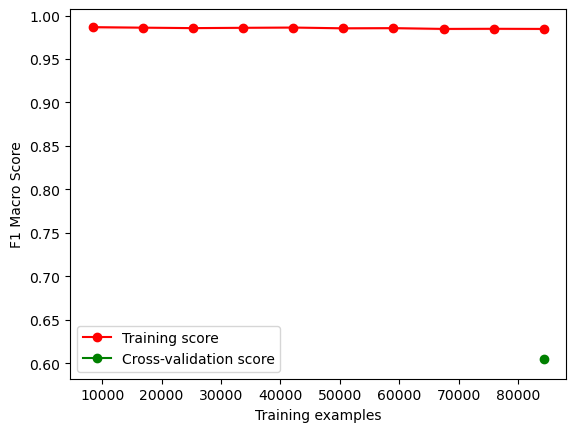

In [17]:
train_sizes, train_scores, test_scores = learning_curve(model,
                                                        X, y,
                                                        n_jobs = -1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("F1 Macro Score")
plt.legend(loc="best")
plt.show()

In [ ]:
evaluation(model)

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.6s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   30.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  30.5s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Classe prédite      Blessé hospitalisé  Blessé léger  Indemne  Tué
Classe réelle                                                     
Blessé hospitalisé                1836          1749      692   44
Blessé léger                      1441          4338     1865   24
Indemne                            465          1558     6493   12
Tué                                332           135       87   13
                    precision    recall  f1-score   support

Blessé hospitalisé       0.45      0.42      0.44      4321
      Blessé léger       0.56      0.57      0.56      7668
           Indemne       0.71      0.76      0.74      8528
               Tué       0.14      0.02      0.04       567

          accuracy                           0.60     21084
         macro avg       0.46      0.44      0.44     21084
      weighted avg       0.59      0.60      0.59     21084

0.44373283217457676
0.2545151212022966
[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.1s
build

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.1s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.4s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.2s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.3s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=   4.4s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.2s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.7s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=   6.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.3s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.3s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=   9.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.3s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.8s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=  12.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.4s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.7s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=  16.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.5s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.7s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=  20.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.5s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   25.4s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=  25.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.6s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   30.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  30.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.1s
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.8s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.1s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.3s
[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.2s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.0s finished
C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\maill\anaconda3\lib\site-packages\sklearn\compose\_c

[Pipeline] ........ (step 2 of 2) Processing classifier, total=   4.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.2s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=   6.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.3s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=   9.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.3s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  12.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.4s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  16.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.5s
building tree 1 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  20.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


# Optimisation

In [16]:
from sklearn.model_selection import RandomizedSearchCV

params = {'classifier__n_estimators': np.arange(100, 300),
    'classifier__max_depth': np.arange(15, 50),
    'classifier__min_samples_split': np.arange(10, 30),
    'classifier__min_samples_leaf': np.arange(1, 20),
    'sel_feat2__k': np.arange(20,120)
}

n_iter_search = 3
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_params = {}

for i in range(10):
    random_search = RandomizedSearchCV(model, param_distributions=params,
                                       n_iter=n_iter_search, cv=n_folds, verbose=2, error_score='raise')
    
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    
    # Afficher les meilleurs paramètres actuels
    print(f"Iteration {i+1}, Best Parameters: {best_params}")
    
    # Réduire la fenêtre de recherche en fonction des meilleurs paramètres trouvés
    params = {
        'classifier__n_estimators': np.arange(max(1,best_params['classifier__n_estimators'] - 10), best_params['classifier__n_estimators'] + 10),
        'classifier__max_depth': np.arange(max(1,best_params['classifier__max_depth'] - 2), best_params['classifier__max_depth'] + 2),
        'classifier__min_samples_split': np.arange(max(2,best_params['classifier__min_samples_split'] - 2), best_params['classifier__min_samples_split'] + 2),
        'classifier__min_samples_leaf': np.arange(max(1, best_params['classifier__min_samples_leaf'] - 2), best_params['classifier__min_samples_leaf'] + 2),
        'sel_feat2__k': np.arange(max(1,best_params['sel_feat2__k'] - 2), best_params['sel_feat2__k'] + 2)
    }

# Afficher les meilleurs paramètres et leur score
print(f"Meilleurs paramètres: {random_search.best_params_}")
print(f"Meilleur score: {random_search.best_score_}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.5s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 195


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  5.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   28.3s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=6, classifier__min_samples_split=20, classifier__n_estimators=195, sel_feat2__k=83; total time= 6.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.2s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 195


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  5.4min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   27.9s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=6, classifier__min_samples_split=20, classifier__n_estimators=195, sel_feat2__k=83; total time= 6.2min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 195


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  5.5min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   28.4s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=6, classifier__min_samples_split=20, classifier__n_estimators=195, sel_feat2__k=83; total time= 6.3min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  7.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:   37.4s finished


[CV] END classifier__max_depth=46, classifier__min_samples_leaf=7, classifier__min_samples_split=26, classifier__n_estimators=266, sel_feat2__k=83; total time= 8.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  6.9min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:   36.8s finished


[CV] END classifier__max_depth=46, classifier__min_samples_leaf=7, classifier__min_samples_split=26, classifier__n_estimators=266, sel_feat2__k=83; total time= 7.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.2s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 266


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 266
building tree 3 of 266
building tree 4 of 266
building tree 5 of 266
building tree 6 of 266
building tree 7 of 266
building tree 8 of 266
building tree 9 of 266
building tree 10 of 266
building tree 11 of 266
building tree 12 of 266
building tree 13 of 266
building tree 14 of 266
building tree 15 of 266
building tree 16 of 266
building tree 17 of 266
building tree 18 of 266
building tree 19 of 266
building tree 20 of 266
building tree 21 of 266
building tree 22 of 266
building tree 23 of 266
building tree 24 of 266
building tree 25 of 266
building tree 26 of 266
building tree 27 of 266
building tree 28 of 266
building tree 29 of 266
building tree 30 of 266
building tree 31 of 266
building tree 32 of 266
building tree 33 of 266
building tree 34 of 266
building tree 35 of 266
building tree 36 of 266
building tree 37 of 266
building tree 38 of 266
building tree 39 of 266
building tree 40 of 266
building tree 41 of 266
building tree 42 of 266
building tree 43 of 266


[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:  7.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 266 out of 266 | elapsed:   37.0s finished


[CV] END classifier__max_depth=46, classifier__min_samples_leaf=7, classifier__min_samples_split=26, classifier__n_estimators=266, sel_feat2__k=83; total time= 8.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 182


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 182
building tree 3 of 182
building tree 4 of 182
building tree 5 of 182
building tree 6 of 182
building tree 7 of 182
building tree 8 of 182
building tree 9 of 182
building tree 10 of 182
building tree 11 of 182
building tree 12 of 182
building tree 13 of 182
building tree 14 of 182
building tree 15 of 182
building tree 16 of 182
building tree 17 of 182
building tree 18 of 182
building tree 19 of 182
building tree 20 of 182
building tree 21 of 182
building tree 22 of 182
building tree 23 of 182
building tree 24 of 182
building tree 25 of 182
building tree 26 of 182
building tree 27 of 182
building tree 28 of 182
building tree 29 of 182
building tree 30 of 182
building tree 31 of 182
building tree 32 of 182
building tree 33 of 182
building tree 34 of 182
building tree 35 of 182
building tree 36 of 182
building tree 37 of 182
building tree 38 of 182
building tree 39 of 182
building tree 40 of 182
building tree 41 of 182
building tree 42 of 182
building tree 43 of 182


[Parallel(n_jobs=1)]: Done 182 out of 182 | elapsed:  4.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 4.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 182 out of 182 | elapsed:   24.1s finished


[CV] END classifier__max_depth=41, classifier__min_samples_leaf=11, classifier__min_samples_split=20, classifier__n_estimators=182, sel_feat2__k=86; total time= 5.3min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.4s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 182


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 182
building tree 3 of 182
building tree 4 of 182
building tree 5 of 182
building tree 6 of 182
building tree 7 of 182
building tree 8 of 182
building tree 9 of 182
building tree 10 of 182
building tree 11 of 182
building tree 12 of 182
building tree 13 of 182
building tree 14 of 182
building tree 15 of 182
building tree 16 of 182
building tree 17 of 182
building tree 18 of 182
building tree 19 of 182
building tree 20 of 182
building tree 21 of 182
building tree 22 of 182
building tree 23 of 182
building tree 24 of 182
building tree 25 of 182
building tree 26 of 182
building tree 27 of 182
building tree 28 of 182
building tree 29 of 182
building tree 30 of 182
building tree 31 of 182
building tree 32 of 182
building tree 33 of 182
building tree 34 of 182
building tree 35 of 182
building tree 36 of 182
building tree 37 of 182
building tree 38 of 182
building tree 39 of 182
building tree 40 of 182
building tree 41 of 182
building tree 42 of 182
building tree 43 of 182


[Parallel(n_jobs=1)]: Done 182 out of 182 | elapsed:  4.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 4.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 182 out of 182 | elapsed:   24.1s finished


[CV] END classifier__max_depth=41, classifier__min_samples_leaf=11, classifier__min_samples_split=20, classifier__n_estimators=182, sel_feat2__k=86; total time= 5.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.2s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 182


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 182
building tree 3 of 182
building tree 4 of 182
building tree 5 of 182
building tree 6 of 182
building tree 7 of 182
building tree 8 of 182
building tree 9 of 182
building tree 10 of 182
building tree 11 of 182
building tree 12 of 182
building tree 13 of 182
building tree 14 of 182
building tree 15 of 182
building tree 16 of 182
building tree 17 of 182
building tree 18 of 182
building tree 19 of 182
building tree 20 of 182
building tree 21 of 182
building tree 22 of 182
building tree 23 of 182
building tree 24 of 182
building tree 25 of 182
building tree 26 of 182
building tree 27 of 182
building tree 28 of 182
building tree 29 of 182
building tree 30 of 182
building tree 31 of 182
building tree 32 of 182
building tree 33 of 182
building tree 34 of 182
building tree 35 of 182
building tree 36 of 182
building tree 37 of 182
building tree 38 of 182
building tree 39 of 182
building tree 40 of 182
building tree 41 of 182
building tree 42 of 182
building tree 43 of 182


[Parallel(n_jobs=1)]: Done 182 out of 182 | elapsed:  4.4min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 4.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 182 out of 182 | elapsed:   23.7s finished


[CV] END classifier__max_depth=41, classifier__min_samples_leaf=11, classifier__min_samples_split=20, classifier__n_estimators=182, sel_feat2__k=86; total time= 5.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.5s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 195


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed: 10.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=10.1min
Iteration 1, Best Parameters: {'sel_feat2__k': 83, 'classifier__n_estimators': 195, 'classifier__min_samples_split': 20, 'classifier__min_samples_leaf': 6, 'classifier__max_depth': 42}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 188


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 188
building tree 3 of 188
building tree 4 of 188
building tree 5 of 188
building tree 6 of 188
building tree 7 of 188
building tree 8 of 188
building tree 9 of 188
building tree 10 of 188
building tree 11 of 188
building tree 12 of 188
building tree 13 of 188
building tree 14 of 188
building tree 15 of 188
building tree 16 of 188
building tree 17 of 188
building tree 18 of 188
building tree 19 of 188
building tree 20 of 188
building tree 21 of 188
building tree 22 of 188
building tree 23 of 188
building tree 24 of 188
building tree 25 of 188
building tree 26 of 188
building tree 27 of 188
building tree 28 of 188
building tree 29 of 188
building tree 30 of 188
building tree 31 of 188
building tree 32 of 188
building tree 33 of 188
building tree 34 of 188
building tree 35 of 188
building tree 36 of 188
building tree 37 of 188
building tree 38 of 188
building tree 39 of 188
building tree 40 of 188
building tree 41 of 188
building tree 42 of 188
building tree 43 of 188


[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:  5.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:   28.4s finished


[CV] END classifier__max_depth=43, classifier__min_samples_leaf=4, classifier__min_samples_split=21, classifier__n_estimators=188, sel_feat2__k=83; total time= 6.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.4s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 188


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 188
building tree 3 of 188
building tree 4 of 188
building tree 5 of 188
building tree 6 of 188
building tree 7 of 188
building tree 8 of 188
building tree 9 of 188
building tree 10 of 188
building tree 11 of 188
building tree 12 of 188
building tree 13 of 188
building tree 14 of 188
building tree 15 of 188
building tree 16 of 188
building tree 17 of 188
building tree 18 of 188
building tree 19 of 188
building tree 20 of 188
building tree 21 of 188
building tree 22 of 188
building tree 23 of 188
building tree 24 of 188
building tree 25 of 188
building tree 26 of 188
building tree 27 of 188
building tree 28 of 188
building tree 29 of 188
building tree 30 of 188
building tree 31 of 188
building tree 32 of 188
building tree 33 of 188
building tree 34 of 188
building tree 35 of 188
building tree 36 of 188
building tree 37 of 188
building tree 38 of 188
building tree 39 of 188
building tree 40 of 188
building tree 41 of 188
building tree 42 of 188
building tree 43 of 188


[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:  5.5min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:   28.2s finished


[CV] END classifier__max_depth=43, classifier__min_samples_leaf=4, classifier__min_samples_split=21, classifier__n_estimators=188, sel_feat2__k=83; total time= 6.3min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 188


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 188
building tree 3 of 188
building tree 4 of 188
building tree 5 of 188
building tree 6 of 188
building tree 7 of 188
building tree 8 of 188
building tree 9 of 188
building tree 10 of 188
building tree 11 of 188
building tree 12 of 188
building tree 13 of 188
building tree 14 of 188
building tree 15 of 188
building tree 16 of 188
building tree 17 of 188
building tree 18 of 188
building tree 19 of 188
building tree 20 of 188
building tree 21 of 188
building tree 22 of 188
building tree 23 of 188
building tree 24 of 188
building tree 25 of 188
building tree 26 of 188
building tree 27 of 188
building tree 28 of 188
building tree 29 of 188
building tree 30 of 188
building tree 31 of 188
building tree 32 of 188
building tree 33 of 188
building tree 34 of 188
building tree 35 of 188
building tree 36 of 188
building tree 37 of 188
building tree 38 of 188
building tree 39 of 188
building tree 40 of 188
building tree 41 of 188
building tree 42 of 188
building tree 43 of 188


[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:  5.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:   28.1s finished


[CV] END classifier__max_depth=43, classifier__min_samples_leaf=4, classifier__min_samples_split=21, classifier__n_estimators=188, sel_feat2__k=83; total time= 6.5min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.2s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.6s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=201, sel_feat2__k=83; total time= 7.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.3s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=201, sel_feat2__k=83; total time= 6.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 201


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.3s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=4, classifier__min_samples_split=19, classifier__n_estimators=201, sel_feat2__k=83; total time= 7.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 198


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 198
building tree 3 of 198
building tree 4 of 198
building tree 5 of 198
building tree 6 of 198
building tree 7 of 198
building tree 8 of 198
building tree 9 of 198
building tree 10 of 198
building tree 11 of 198
building tree 12 of 198
building tree 13 of 198
building tree 14 of 198
building tree 15 of 198
building tree 16 of 198
building tree 17 of 198
building tree 18 of 198
building tree 19 of 198
building tree 20 of 198
building tree 21 of 198
building tree 22 of 198
building tree 23 of 198
building tree 24 of 198
building tree 25 of 198
building tree 26 of 198
building tree 27 of 198
building tree 28 of 198
building tree 29 of 198
building tree 30 of 198
building tree 31 of 198
building tree 32 of 198
building tree 33 of 198
building tree 34 of 198
building tree 35 of 198
building tree 36 of 198
building tree 37 of 198
building tree 38 of 198
building tree 39 of 198
building tree 40 of 198
building tree 41 of 198
building tree 42 of 198
building tree 43 of 198


[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:  5.8min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   29.2s finished


[CV] END classifier__max_depth=43, classifier__min_samples_leaf=5, classifier__min_samples_split=21, classifier__n_estimators=198, sel_feat2__k=84; total time= 6.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.2s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 198


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 198
building tree 3 of 198
building tree 4 of 198
building tree 5 of 198
building tree 6 of 198
building tree 7 of 198
building tree 8 of 198
building tree 9 of 198
building tree 10 of 198
building tree 11 of 198
building tree 12 of 198
building tree 13 of 198
building tree 14 of 198
building tree 15 of 198
building tree 16 of 198
building tree 17 of 198
building tree 18 of 198
building tree 19 of 198
building tree 20 of 198
building tree 21 of 198
building tree 22 of 198
building tree 23 of 198
building tree 24 of 198
building tree 25 of 198
building tree 26 of 198
building tree 27 of 198
building tree 28 of 198
building tree 29 of 198
building tree 30 of 198
building tree 31 of 198
building tree 32 of 198
building tree 33 of 198
building tree 34 of 198
building tree 35 of 198
building tree 36 of 198
building tree 37 of 198
building tree 38 of 198
building tree 39 of 198
building tree 40 of 198
building tree 41 of 198
building tree 42 of 198
building tree 43 of 198


[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:  5.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   29.0s finished


[CV] END classifier__max_depth=43, classifier__min_samples_leaf=5, classifier__min_samples_split=21, classifier__n_estimators=198, sel_feat2__k=84; total time= 6.5min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 198


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 198
building tree 3 of 198
building tree 4 of 198
building tree 5 of 198
building tree 6 of 198
building tree 7 of 198
building tree 8 of 198
building tree 9 of 198
building tree 10 of 198
building tree 11 of 198
building tree 12 of 198
building tree 13 of 198
building tree 14 of 198
building tree 15 of 198
building tree 16 of 198
building tree 17 of 198
building tree 18 of 198
building tree 19 of 198
building tree 20 of 198
building tree 21 of 198
building tree 22 of 198
building tree 23 of 198
building tree 24 of 198
building tree 25 of 198
building tree 26 of 198
building tree 27 of 198
building tree 28 of 198
building tree 29 of 198
building tree 30 of 198
building tree 31 of 198
building tree 32 of 198
building tree 33 of 198
building tree 34 of 198
building tree 35 of 198
building tree 36 of 198
building tree 37 of 198
building tree 38 of 198
building tree 39 of 198
building tree 40 of 198
building tree 41 of 198
building tree 42 of 198
building tree 43 of 198


[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:  5.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   28.9s finished


[CV] END classifier__max_depth=43, classifier__min_samples_leaf=5, classifier__min_samples_split=21, classifier__n_estimators=198, sel_feat2__k=84; total time= 6.5min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 11.5min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=11.5min
Iteration 2, Best Parameters: {'sel_feat2__k': 83, 'classifier__n_estimators': 201, 'classifier__min_samples_split': 19, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 42}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 195


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   33.3s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=4, classifier__min_samples_split=20, classifier__n_estimators=195, sel_feat2__k=84; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   4.0s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 195


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   30.7s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=4, classifier__min_samples_split=20, classifier__n_estimators=195, sel_feat2__k=84; total time= 7.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.3s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 195


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   30.0s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=4, classifier__min_samples_split=20, classifier__n_estimators=195, sel_feat2__k=84; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.4s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 192


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 192
building tree 3 of 192
building tree 4 of 192
building tree 5 of 192
building tree 6 of 192
building tree 7 of 192
building tree 8 of 192
building tree 9 of 192
building tree 10 of 192
building tree 11 of 192
building tree 12 of 192
building tree 13 of 192
building tree 14 of 192
building tree 15 of 192
building tree 16 of 192
building tree 17 of 192
building tree 18 of 192
building tree 19 of 192
building tree 20 of 192
building tree 21 of 192
building tree 22 of 192
building tree 23 of 192
building tree 24 of 192
building tree 25 of 192
building tree 26 of 192
building tree 27 of 192
building tree 28 of 192
building tree 29 of 192
building tree 30 of 192
building tree 31 of 192
building tree 32 of 192
building tree 33 of 192
building tree 34 of 192
building tree 35 of 192
building tree 36 of 192
building tree 37 of 192
building tree 38 of 192
building tree 39 of 192
building tree 40 of 192
building tree 41 of 192
building tree 42 of 192
building tree 43 of 192


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   29.9s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=4, classifier__min_samples_split=20, classifier__n_estimators=192, sel_feat2__k=84; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.6s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 192


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 192
building tree 3 of 192
building tree 4 of 192
building tree 5 of 192
building tree 6 of 192
building tree 7 of 192
building tree 8 of 192
building tree 9 of 192
building tree 10 of 192
building tree 11 of 192
building tree 12 of 192
building tree 13 of 192
building tree 14 of 192
building tree 15 of 192
building tree 16 of 192
building tree 17 of 192
building tree 18 of 192
building tree 19 of 192
building tree 20 of 192
building tree 21 of 192
building tree 22 of 192
building tree 23 of 192
building tree 24 of 192
building tree 25 of 192
building tree 26 of 192
building tree 27 of 192
building tree 28 of 192
building tree 29 of 192
building tree 30 of 192
building tree 31 of 192
building tree 32 of 192
building tree 33 of 192
building tree 34 of 192
building tree 35 of 192
building tree 36 of 192
building tree 37 of 192
building tree 38 of 192
building tree 39 of 192
building tree 40 of 192
building tree 41 of 192
building tree 42 of 192
building tree 43 of 192


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  6.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   29.6s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=4, classifier__min_samples_split=20, classifier__n_estimators=192, sel_feat2__k=84; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 192


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 192
building tree 3 of 192
building tree 4 of 192
building tree 5 of 192
building tree 6 of 192
building tree 7 of 192
building tree 8 of 192
building tree 9 of 192
building tree 10 of 192
building tree 11 of 192
building tree 12 of 192
building tree 13 of 192
building tree 14 of 192
building tree 15 of 192
building tree 16 of 192
building tree 17 of 192
building tree 18 of 192
building tree 19 of 192
building tree 20 of 192
building tree 21 of 192
building tree 22 of 192
building tree 23 of 192
building tree 24 of 192
building tree 25 of 192
building tree 26 of 192
building tree 27 of 192
building tree 28 of 192
building tree 29 of 192
building tree 30 of 192
building tree 31 of 192
building tree 32 of 192
building tree 33 of 192
building tree 34 of 192
building tree 35 of 192
building tree 36 of 192
building tree 37 of 192
building tree 38 of 192
building tree 39 of 192
building tree 40 of 192
building tree 41 of 192
building tree 42 of 192
building tree 43 of 192


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   30.9s finished


[CV] END classifier__max_depth=42, classifier__min_samples_leaf=4, classifier__min_samples_split=20, classifier__n_estimators=192, sel_feat2__k=84; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.3s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 204


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 204
building tree 3 of 204
building tree 4 of 204
building tree 5 of 204
building tree 6 of 204
building tree 7 of 204
building tree 8 of 204
building tree 9 of 204
building tree 10 of 204
building tree 11 of 204
building tree 12 of 204
building tree 13 of 204
building tree 14 of 204
building tree 15 of 204
building tree 16 of 204
building tree 17 of 204
building tree 18 of 204
building tree 19 of 204
building tree 20 of 204
building tree 21 of 204
building tree 22 of 204
building tree 23 of 204
building tree 24 of 204
building tree 25 of 204
building tree 26 of 204
building tree 27 of 204
building tree 28 of 204
building tree 29 of 204
building tree 30 of 204
building tree 31 of 204
building tree 32 of 204
building tree 33 of 204
building tree 34 of 204
building tree 35 of 204
building tree 36 of 204
building tree 37 of 204
building tree 38 of 204
building tree 39 of 204
building tree 40 of 204
building tree 41 of 204
building tree 42 of 204
building tree 43 of 204


[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:  6.9min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:   33.1s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=204, sel_feat2__k=84; total time= 7.7min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 204


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 204
building tree 3 of 204
building tree 4 of 204
building tree 5 of 204
building tree 6 of 204
building tree 7 of 204
building tree 8 of 204
building tree 9 of 204
building tree 10 of 204
building tree 11 of 204
building tree 12 of 204
building tree 13 of 204
building tree 14 of 204
building tree 15 of 204
building tree 16 of 204
building tree 17 of 204
building tree 18 of 204
building tree 19 of 204
building tree 20 of 204
building tree 21 of 204
building tree 22 of 204
building tree 23 of 204
building tree 24 of 204
building tree 25 of 204
building tree 26 of 204
building tree 27 of 204
building tree 28 of 204
building tree 29 of 204
building tree 30 of 204
building tree 31 of 204
building tree 32 of 204
building tree 33 of 204
building tree 34 of 204
building tree 35 of 204
building tree 36 of 204
building tree 37 of 204
building tree 38 of 204
building tree 39 of 204
building tree 40 of 204
building tree 41 of 204
building tree 42 of 204
building tree 43 of 204


[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:  6.8min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:   32.8s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=204, sel_feat2__k=84; total time= 7.7min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.3s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 204


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 204
building tree 3 of 204
building tree 4 of 204
building tree 5 of 204
building tree 6 of 204
building tree 7 of 204
building tree 8 of 204
building tree 9 of 204
building tree 10 of 204
building tree 11 of 204
building tree 12 of 204
building tree 13 of 204
building tree 14 of 204
building tree 15 of 204
building tree 16 of 204
building tree 17 of 204
building tree 18 of 204
building tree 19 of 204
building tree 20 of 204
building tree 21 of 204
building tree 22 of 204
building tree 23 of 204
building tree 24 of 204
building tree 25 of 204
building tree 26 of 204
building tree 27 of 204
building tree 28 of 204
building tree 29 of 204
building tree 30 of 204
building tree 31 of 204
building tree 32 of 204
building tree 33 of 204
building tree 34 of 204
building tree 35 of 204
building tree 36 of 204
building tree 37 of 204
building tree 38 of 204
building tree 39 of 204
building tree 40 of 204
building tree 41 of 204
building tree 42 of 204
building tree 43 of 204


[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:  6.8min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:   33.3s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=204, sel_feat2__k=84; total time= 7.7min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 204


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 204
building tree 3 of 204
building tree 4 of 204
building tree 5 of 204
building tree 6 of 204
building tree 7 of 204
building tree 8 of 204
building tree 9 of 204
building tree 10 of 204
building tree 11 of 204
building tree 12 of 204
building tree 13 of 204
building tree 14 of 204
building tree 15 of 204
building tree 16 of 204
building tree 17 of 204
building tree 18 of 204
building tree 19 of 204
building tree 20 of 204
building tree 21 of 204
building tree 22 of 204
building tree 23 of 204
building tree 24 of 204
building tree 25 of 204
building tree 26 of 204
building tree 27 of 204
building tree 28 of 204
building tree 29 of 204
building tree 30 of 204
building tree 31 of 204
building tree 32 of 204
building tree 33 of 204
building tree 34 of 204
building tree 35 of 204
building tree 36 of 204
building tree 37 of 204
building tree 38 of 204
building tree 39 of 204
building tree 40 of 204
building tree 41 of 204
building tree 42 of 204
building tree 43 of 204


[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed: 12.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=12.6min
Iteration 3, Best Parameters: {'sel_feat2__k': 84, 'classifier__n_estimators': 204, 'classifier__min_samples_split': 18, 'classifier__min_samples_leaf': 3, 'classifier__max_depth': 40}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  10.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   4.1s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 212


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 212
building tree 3 of 212
building tree 4 of 212
building tree 5 of 212
building tree 6 of 212
building tree 7 of 212
building tree 8 of 212
building tree 9 of 212
building tree 10 of 212
building tree 11 of 212
building tree 12 of 212
building tree 13 of 212
building tree 14 of 212
building tree 15 of 212
building tree 16 of 212
building tree 17 of 212
building tree 18 of 212
building tree 19 of 212
building tree 20 of 212
building tree 21 of 212
building tree 22 of 212
building tree 23 of 212
building tree 24 of 212
building tree 25 of 212
building tree 26 of 212
building tree 27 of 212
building tree 28 of 212
building tree 29 of 212
building tree 30 of 212
building tree 31 of 212
building tree 32 of 212
building tree 33 of 212
building tree 34 of 212
building tree 35 of 212
building tree 36 of 212
building tree 37 of 212
building tree 38 of 212
building tree 39 of 212
building tree 40 of 212
building tree 41 of 212
building tree 42 of 212
building tree 43 of 212


[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:  7.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:   36.3s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=17, classifier__n_estimators=212, sel_feat2__k=82; total time= 8.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.2s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 212


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 212
building tree 3 of 212
building tree 4 of 212
building tree 5 of 212
building tree 6 of 212
building tree 7 of 212
building tree 8 of 212
building tree 9 of 212
building tree 10 of 212
building tree 11 of 212
building tree 12 of 212
building tree 13 of 212
building tree 14 of 212
building tree 15 of 212
building tree 16 of 212
building tree 17 of 212
building tree 18 of 212
building tree 19 of 212
building tree 20 of 212
building tree 21 of 212
building tree 22 of 212
building tree 23 of 212
building tree 24 of 212
building tree 25 of 212
building tree 26 of 212
building tree 27 of 212
building tree 28 of 212
building tree 29 of 212
building tree 30 of 212
building tree 31 of 212
building tree 32 of 212
building tree 33 of 212
building tree 34 of 212
building tree 35 of 212
building tree 36 of 212
building tree 37 of 212
building tree 38 of 212
building tree 39 of 212
building tree 40 of 212
building tree 41 of 212
building tree 42 of 212
building tree 43 of 212


[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:   32.4s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=17, classifier__n_estimators=212, sel_feat2__k=82; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 212


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 212
building tree 3 of 212
building tree 4 of 212
building tree 5 of 212
building tree 6 of 212
building tree 7 of 212
building tree 8 of 212
building tree 9 of 212
building tree 10 of 212
building tree 11 of 212
building tree 12 of 212
building tree 13 of 212
building tree 14 of 212
building tree 15 of 212
building tree 16 of 212
building tree 17 of 212
building tree 18 of 212
building tree 19 of 212
building tree 20 of 212
building tree 21 of 212
building tree 22 of 212
building tree 23 of 212
building tree 24 of 212
building tree 25 of 212
building tree 26 of 212
building tree 27 of 212
building tree 28 of 212
building tree 29 of 212
building tree 30 of 212
building tree 31 of 212
building tree 32 of 212
building tree 33 of 212
building tree 34 of 212
building tree 35 of 212
building tree 36 of 212
building tree 37 of 212
building tree 38 of 212
building tree 39 of 212
building tree 40 of 212
building tree 41 of 212
building tree 42 of 212
building tree 43 of 212


[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:  6.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:   32.6s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=17, classifier__n_estimators=212, sel_feat2__k=82; total time= 7.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.5min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   31.2s finished


[CV] END classifier__max_depth=41, classifier__min_samples_leaf=3, classifier__min_samples_split=17, classifier__n_estimators=201, sel_feat2__k=83; total time= 7.3min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.3min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.8s finished


[CV] END classifier__max_depth=41, classifier__min_samples_leaf=3, classifier__min_samples_split=17, classifier__n_estimators=201, sel_feat2__k=83; total time= 7.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.4min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.9s finished


[CV] END classifier__max_depth=41, classifier__min_samples_leaf=3, classifier__min_samples_split=17, classifier__n_estimators=201, sel_feat2__k=83; total time= 7.2min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 213


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 213
building tree 3 of 213
building tree 4 of 213
building tree 5 of 213
building tree 6 of 213
building tree 7 of 213
building tree 8 of 213
building tree 9 of 213
building tree 10 of 213
building tree 11 of 213
building tree 12 of 213
building tree 13 of 213
building tree 14 of 213
building tree 15 of 213
building tree 16 of 213
building tree 17 of 213
building tree 18 of 213
building tree 19 of 213
building tree 20 of 213
building tree 21 of 213
building tree 22 of 213
building tree 23 of 213
building tree 24 of 213
building tree 25 of 213
building tree 26 of 213
building tree 27 of 213
building tree 28 of 213
building tree 29 of 213
building tree 30 of 213
building tree 31 of 213
building tree 32 of 213
building tree 33 of 213
building tree 34 of 213
building tree 35 of 213
building tree 36 of 213
building tree 37 of 213
building tree 38 of 213
building tree 39 of 213
building tree 40 of 213
building tree 41 of 213
building tree 42 of 213
building tree 43 of 213


[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:   31.9s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=4, classifier__min_samples_split=18, classifier__n_estimators=213, sel_feat2__k=85; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 213


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 213
building tree 3 of 213
building tree 4 of 213
building tree 5 of 213
building tree 6 of 213
building tree 7 of 213
building tree 8 of 213
building tree 9 of 213
building tree 10 of 213
building tree 11 of 213
building tree 12 of 213
building tree 13 of 213
building tree 14 of 213
building tree 15 of 213
building tree 16 of 213
building tree 17 of 213
building tree 18 of 213
building tree 19 of 213
building tree 20 of 213
building tree 21 of 213
building tree 22 of 213
building tree 23 of 213
building tree 24 of 213
building tree 25 of 213
building tree 26 of 213
building tree 27 of 213
building tree 28 of 213
building tree 29 of 213
building tree 30 of 213
building tree 31 of 213
building tree 32 of 213
building tree 33 of 213
building tree 34 of 213
building tree 35 of 213
building tree 36 of 213
building tree 37 of 213
building tree 38 of 213
building tree 39 of 213
building tree 40 of 213
building tree 41 of 213
building tree 42 of 213
building tree 43 of 213


[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:   32.0s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=4, classifier__min_samples_split=18, classifier__n_estimators=213, sel_feat2__k=85; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 213


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 213
building tree 3 of 213
building tree 4 of 213
building tree 5 of 213
building tree 6 of 213
building tree 7 of 213
building tree 8 of 213
building tree 9 of 213
building tree 10 of 213
building tree 11 of 213
building tree 12 of 213
building tree 13 of 213
building tree 14 of 213
building tree 15 of 213
building tree 16 of 213
building tree 17 of 213
building tree 18 of 213
building tree 19 of 213
building tree 20 of 213
building tree 21 of 213
building tree 22 of 213
building tree 23 of 213
building tree 24 of 213
building tree 25 of 213
building tree 26 of 213
building tree 27 of 213
building tree 28 of 213
building tree 29 of 213
building tree 30 of 213
building tree 31 of 213
building tree 32 of 213
building tree 33 of 213
building tree 34 of 213
building tree 35 of 213
building tree 36 of 213
building tree 37 of 213
building tree 38 of 213
building tree 39 of 213
building tree 40 of 213
building tree 41 of 213
building tree 42 of 213
building tree 43 of 213


[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:  6.4min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:   31.9s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=4, classifier__min_samples_split=18, classifier__n_estimators=213, sel_feat2__k=85; total time= 7.3min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.4s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 11.9min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=11.9min
Iteration 4, Best Parameters: {'sel_feat2__k': 83, 'classifier__n_estimators': 201, 'classifier__min_samples_split': 17, 'classifier__min_samples_leaf': 3, 'classifier__max_depth': 41}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 206


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 206
building tree 3 of 206
building tree 4 of 206
building tree 5 of 206
building tree 6 of 206
building tree 7 of 206
building tree 8 of 206
building tree 9 of 206
building tree 10 of 206
building tree 11 of 206
building tree 12 of 206
building tree 13 of 206
building tree 14 of 206
building tree 15 of 206
building tree 16 of 206
building tree 17 of 206
building tree 18 of 206
building tree 19 of 206
building tree 20 of 206
building tree 21 of 206
building tree 22 of 206
building tree 23 of 206
building tree 24 of 206
building tree 25 of 206
building tree 26 of 206
building tree 27 of 206
building tree 28 of 206
building tree 29 of 206
building tree 30 of 206
building tree 31 of 206
building tree 32 of 206
building tree 33 of 206
building tree 34 of 206
building tree 35 of 206
building tree 36 of 206
building tree 37 of 206
building tree 38 of 206
building tree 39 of 206
building tree 40 of 206
building tree 41 of 206
building tree 42 of 206
building tree 43 of 206


[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:  7.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:   34.6s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=1, classifier__min_samples_split=17, classifier__n_estimators=206, sel_feat2__k=84; total time= 8.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 206


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 206
building tree 3 of 206
building tree 4 of 206
building tree 5 of 206
building tree 6 of 206
building tree 7 of 206
building tree 8 of 206
building tree 9 of 206
building tree 10 of 206
building tree 11 of 206
building tree 12 of 206
building tree 13 of 206
building tree 14 of 206
building tree 15 of 206
building tree 16 of 206
building tree 17 of 206
building tree 18 of 206
building tree 19 of 206
building tree 20 of 206
building tree 21 of 206
building tree 22 of 206
building tree 23 of 206
building tree 24 of 206
building tree 25 of 206
building tree 26 of 206
building tree 27 of 206
building tree 28 of 206
building tree 29 of 206
building tree 30 of 206
building tree 31 of 206
building tree 32 of 206
building tree 33 of 206
building tree 34 of 206
building tree 35 of 206
building tree 36 of 206
building tree 37 of 206
building tree 38 of 206
building tree 39 of 206
building tree 40 of 206
building tree 41 of 206
building tree 42 of 206
building tree 43 of 206


[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:  7.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:   34.8s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=1, classifier__min_samples_split=17, classifier__n_estimators=206, sel_feat2__k=84; total time= 8.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.7s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 206


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 206
building tree 3 of 206
building tree 4 of 206
building tree 5 of 206
building tree 6 of 206
building tree 7 of 206
building tree 8 of 206
building tree 9 of 206
building tree 10 of 206
building tree 11 of 206
building tree 12 of 206
building tree 13 of 206
building tree 14 of 206
building tree 15 of 206
building tree 16 of 206
building tree 17 of 206
building tree 18 of 206
building tree 19 of 206
building tree 20 of 206
building tree 21 of 206
building tree 22 of 206
building tree 23 of 206
building tree 24 of 206
building tree 25 of 206
building tree 26 of 206
building tree 27 of 206
building tree 28 of 206
building tree 29 of 206
building tree 30 of 206
building tree 31 of 206
building tree 32 of 206
building tree 33 of 206
building tree 34 of 206
building tree 35 of 206
building tree 36 of 206
building tree 37 of 206
building tree 38 of 206
building tree 39 of 206
building tree 40 of 206
building tree 41 of 206
building tree 42 of 206
building tree 43 of 206


[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:  7.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:   34.6s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=1, classifier__min_samples_split=17, classifier__n_estimators=206, sel_feat2__k=84; total time= 8.5min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 195


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   31.0s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=2, classifier__min_samples_split=18, classifier__n_estimators=195, sel_feat2__k=81; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 195


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.3min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   31.0s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=2, classifier__min_samples_split=18, classifier__n_estimators=195, sel_feat2__k=81; total time= 7.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.6s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 195


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.4min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   30.9s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=2, classifier__min_samples_split=18, classifier__n_estimators=195, sel_feat2__k=81; total time= 7.3min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 196


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 196
building tree 3 of 196
building tree 4 of 196
building tree 5 of 196
building tree 6 of 196
building tree 7 of 196
building tree 8 of 196
building tree 9 of 196
building tree 10 of 196
building tree 11 of 196
building tree 12 of 196
building tree 13 of 196
building tree 14 of 196
building tree 15 of 196
building tree 16 of 196
building tree 17 of 196
building tree 18 of 196
building tree 19 of 196
building tree 20 of 196
building tree 21 of 196
building tree 22 of 196
building tree 23 of 196
building tree 24 of 196
building tree 25 of 196
building tree 26 of 196
building tree 27 of 196
building tree 28 of 196
building tree 29 of 196
building tree 30 of 196
building tree 31 of 196
building tree 32 of 196
building tree 33 of 196
building tree 34 of 196
building tree 35 of 196
building tree 36 of 196
building tree 37 of 196
building tree 38 of 196
building tree 39 of 196
building tree 40 of 196
building tree 41 of 196
building tree 42 of 196
building tree 43 of 196


[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:  6.3min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:   30.3s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=196, sel_feat2__k=83; total time= 7.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 196


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 196
building tree 3 of 196
building tree 4 of 196
building tree 5 of 196
building tree 6 of 196
building tree 7 of 196
building tree 8 of 196
building tree 9 of 196
building tree 10 of 196
building tree 11 of 196
building tree 12 of 196
building tree 13 of 196
building tree 14 of 196
building tree 15 of 196
building tree 16 of 196
building tree 17 of 196
building tree 18 of 196
building tree 19 of 196
building tree 20 of 196
building tree 21 of 196
building tree 22 of 196
building tree 23 of 196
building tree 24 of 196
building tree 25 of 196
building tree 26 of 196
building tree 27 of 196
building tree 28 of 196
building tree 29 of 196
building tree 30 of 196
building tree 31 of 196
building tree 32 of 196
building tree 33 of 196
building tree 34 of 196
building tree 35 of 196
building tree 36 of 196
building tree 37 of 196
building tree 38 of 196
building tree 39 of 196
building tree 40 of 196
building tree 41 of 196
building tree 42 of 196
building tree 43 of 196


[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:  6.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:   29.9s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=196, sel_feat2__k=83; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 196


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 196
building tree 3 of 196
building tree 4 of 196
building tree 5 of 196
building tree 6 of 196
building tree 7 of 196
building tree 8 of 196
building tree 9 of 196
building tree 10 of 196
building tree 11 of 196
building tree 12 of 196
building tree 13 of 196
building tree 14 of 196
building tree 15 of 196
building tree 16 of 196
building tree 17 of 196
building tree 18 of 196
building tree 19 of 196
building tree 20 of 196
building tree 21 of 196
building tree 22 of 196
building tree 23 of 196
building tree 24 of 196
building tree 25 of 196
building tree 26 of 196
building tree 27 of 196
building tree 28 of 196
building tree 29 of 196
building tree 30 of 196
building tree 31 of 196
building tree 32 of 196
building tree 33 of 196
building tree 34 of 196
building tree 35 of 196
building tree 36 of 196
building tree 37 of 196
building tree 38 of 196
building tree 39 of 196
building tree 40 of 196
building tree 41 of 196
building tree 42 of 196
building tree 43 of 196


[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:   29.6s finished


[CV] END classifier__max_depth=39, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=196, sel_feat2__k=83; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.6s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 195


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed: 11.8min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=11.8min
Iteration 5, Best Parameters: {'sel_feat2__k': 81, 'classifier__n_estimators': 195, 'classifier__min_samples_split': 18, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 39}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 195


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   30.3s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=195, sel_feat2__k=82; total time= 7.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.7s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 195


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   29.9s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=195, sel_feat2__k=82; total time= 6.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 195


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 195
building tree 3 of 195
building tree 4 of 195
building tree 5 of 195
building tree 6 of 195
building tree 7 of 195
building tree 8 of 195
building tree 9 of 195
building tree 10 of 195
building tree 11 of 195
building tree 12 of 195
building tree 13 of 195
building tree 14 of 195
building tree 15 of 195
building tree 16 of 195
building tree 17 of 195
building tree 18 of 195
building tree 19 of 195
building tree 20 of 195
building tree 21 of 195
building tree 22 of 195
building tree 23 of 195
building tree 24 of 195
building tree 25 of 195
building tree 26 of 195
building tree 27 of 195
building tree 28 of 195
building tree 29 of 195
building tree 30 of 195
building tree 31 of 195
building tree 32 of 195
building tree 33 of 195
building tree 34 of 195
building tree 35 of 195
building tree 36 of 195
building tree 37 of 195
building tree 38 of 195
building tree 39 of 195
building tree 40 of 195
building tree 41 of 195
building tree 42 of 195
building tree 43 of 195


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   30.0s finished


[CV] END classifier__max_depth=40, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=195, sel_feat2__k=82; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.7s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 201


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  5.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.3s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=201, sel_feat2__k=80; total time= 6.5min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 201


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  5.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.2s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=201, sel_feat2__k=80; total time= 6.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  5.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.3s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=201, sel_feat2__k=80; total time= 6.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.7s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 189


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 189
building tree 3 of 189
building tree 4 of 189
building tree 5 of 189
building tree 6 of 189
building tree 7 of 189
building tree 8 of 189
building tree 9 of 189
building tree 10 of 189
building tree 11 of 189
building tree 12 of 189
building tree 13 of 189
building tree 14 of 189
building tree 15 of 189
building tree 16 of 189
building tree 17 of 189
building tree 18 of 189
building tree 19 of 189
building tree 20 of 189
building tree 21 of 189
building tree 22 of 189
building tree 23 of 189
building tree 24 of 189
building tree 25 of 189
building tree 26 of 189
building tree 27 of 189
building tree 28 of 189
building tree 29 of 189
building tree 30 of 189
building tree 31 of 189
building tree 32 of 189
building tree 33 of 189
building tree 34 of 189
building tree 35 of 189
building tree 36 of 189
building tree 37 of 189
building tree 38 of 189
building tree 39 of 189
building tree 40 of 189
building tree 41 of 189
building tree 42 of 189
building tree 43 of 189


[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:   31.9s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=1, classifier__min_samples_split=16, classifier__n_estimators=189, sel_feat2__k=80; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 189


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 189
building tree 3 of 189
building tree 4 of 189
building tree 5 of 189
building tree 6 of 189
building tree 7 of 189
building tree 8 of 189
building tree 9 of 189
building tree 10 of 189
building tree 11 of 189
building tree 12 of 189
building tree 13 of 189
building tree 14 of 189
building tree 15 of 189
building tree 16 of 189
building tree 17 of 189
building tree 18 of 189
building tree 19 of 189
building tree 20 of 189
building tree 21 of 189
building tree 22 of 189
building tree 23 of 189
building tree 24 of 189
building tree 25 of 189
building tree 26 of 189
building tree 27 of 189
building tree 28 of 189
building tree 29 of 189
building tree 30 of 189
building tree 31 of 189
building tree 32 of 189
building tree 33 of 189
building tree 34 of 189
building tree 35 of 189
building tree 36 of 189
building tree 37 of 189
building tree 38 of 189
building tree 39 of 189
building tree 40 of 189
building tree 41 of 189
building tree 42 of 189
building tree 43 of 189


[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:   32.3s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=1, classifier__min_samples_split=16, classifier__n_estimators=189, sel_feat2__k=80; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 189


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 189
building tree 3 of 189
building tree 4 of 189
building tree 5 of 189
building tree 6 of 189
building tree 7 of 189
building tree 8 of 189
building tree 9 of 189
building tree 10 of 189
building tree 11 of 189
building tree 12 of 189
building tree 13 of 189
building tree 14 of 189
building tree 15 of 189
building tree 16 of 189
building tree 17 of 189
building tree 18 of 189
building tree 19 of 189
building tree 20 of 189
building tree 21 of 189
building tree 22 of 189
building tree 23 of 189
building tree 24 of 189
building tree 25 of 189
building tree 26 of 189
building tree 27 of 189
building tree 28 of 189
building tree 29 of 189
building tree 30 of 189
building tree 31 of 189
building tree 32 of 189
building tree 33 of 189
building tree 34 of 189
building tree 35 of 189
building tree 36 of 189
building tree 37 of 189
building tree 38 of 189
building tree 39 of 189
building tree 40 of 189
building tree 41 of 189
building tree 42 of 189
building tree 43 of 189


[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:  6.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:   32.4s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=1, classifier__min_samples_split=16, classifier__n_estimators=189, sel_feat2__k=80; total time= 7.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 10.3min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=10.4min
Iteration 6, Best Parameters: {'sel_feat2__k': 80, 'classifier__n_estimators': 201, 'classifier__min_samples_split': 18, 'classifier__min_samples_leaf': 3, 'classifier__max_depth': 38}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 193


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 193
building tree 3 of 193
building tree 4 of 193
building tree 5 of 193
building tree 6 of 193
building tree 7 of 193
building tree 8 of 193
building tree 9 of 193
building tree 10 of 193
building tree 11 of 193
building tree 12 of 193
building tree 13 of 193
building tree 14 of 193
building tree 15 of 193
building tree 16 of 193
building tree 17 of 193
building tree 18 of 193
building tree 19 of 193
building tree 20 of 193
building tree 21 of 193
building tree 22 of 193
building tree 23 of 193
building tree 24 of 193
building tree 25 of 193
building tree 26 of 193
building tree 27 of 193
building tree 28 of 193
building tree 29 of 193
building tree 30 of 193
building tree 31 of 193
building tree 32 of 193
building tree 33 of 193
building tree 34 of 193
building tree 35 of 193
building tree 36 of 193
building tree 37 of 193
building tree 38 of 193
building tree 39 of 193
building tree 40 of 193
building tree 41 of 193
building tree 42 of 193
building tree 43 of 193


[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:  5.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:   28.2s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=4, classifier__min_samples_split=18, classifier__n_estimators=193, sel_feat2__k=79; total time= 6.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 193


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 193
building tree 3 of 193
building tree 4 of 193
building tree 5 of 193
building tree 6 of 193
building tree 7 of 193
building tree 8 of 193
building tree 9 of 193
building tree 10 of 193
building tree 11 of 193
building tree 12 of 193
building tree 13 of 193
building tree 14 of 193
building tree 15 of 193
building tree 16 of 193
building tree 17 of 193
building tree 18 of 193
building tree 19 of 193
building tree 20 of 193
building tree 21 of 193
building tree 22 of 193
building tree 23 of 193
building tree 24 of 193
building tree 25 of 193
building tree 26 of 193
building tree 27 of 193
building tree 28 of 193
building tree 29 of 193
building tree 30 of 193
building tree 31 of 193
building tree 32 of 193
building tree 33 of 193
building tree 34 of 193
building tree 35 of 193
building tree 36 of 193
building tree 37 of 193
building tree 38 of 193
building tree 39 of 193
building tree 40 of 193
building tree 41 of 193
building tree 42 of 193
building tree 43 of 193


[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:  5.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:   27.8s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=4, classifier__min_samples_split=18, classifier__n_estimators=193, sel_feat2__k=79; total time= 5.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 193


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 193
building tree 3 of 193
building tree 4 of 193
building tree 5 of 193
building tree 6 of 193
building tree 7 of 193
building tree 8 of 193
building tree 9 of 193
building tree 10 of 193
building tree 11 of 193
building tree 12 of 193
building tree 13 of 193
building tree 14 of 193
building tree 15 of 193
building tree 16 of 193
building tree 17 of 193
building tree 18 of 193
building tree 19 of 193
building tree 20 of 193
building tree 21 of 193
building tree 22 of 193
building tree 23 of 193
building tree 24 of 193
building tree 25 of 193
building tree 26 of 193
building tree 27 of 193
building tree 28 of 193
building tree 29 of 193
building tree 30 of 193
building tree 31 of 193
building tree 32 of 193
building tree 33 of 193
building tree 34 of 193
building tree 35 of 193
building tree 36 of 193
building tree 37 of 193
building tree 38 of 193
building tree 39 of 193
building tree 40 of 193
building tree 41 of 193
building tree 42 of 193
building tree 43 of 193


[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:  5.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 193 out of 193 | elapsed:   28.0s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=4, classifier__min_samples_split=18, classifier__n_estimators=193, sel_feat2__k=79; total time= 5.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   31.6s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=200, sel_feat2__k=80; total time= 7.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   31.5s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=200, sel_feat2__k=80; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   31.7s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=200, sel_feat2__k=80; total time= 7.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 205


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  6.3min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   32.8s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=2, classifier__min_samples_split=16, classifier__n_estimators=205, sel_feat2__k=78; total time= 7.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 205


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   32.2s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=2, classifier__min_samples_split=16, classifier__n_estimators=205, sel_feat2__k=78; total time= 7.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 205


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  6.3min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.3min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   32.9s finished


[CV] END classifier__max_depth=38, classifier__min_samples_leaf=2, classifier__min_samples_split=16, classifier__n_estimators=205, sel_feat2__k=78; total time= 7.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.4s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 11.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=11.3min
Iteration 7, Best Parameters: {'sel_feat2__k': 80, 'classifier__n_estimators': 200, 'classifier__min_samples_split': 17, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 36}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 203


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 203
building tree 3 of 203
building tree 4 of 203
building tree 5 of 203
building tree 6 of 203
building tree 7 of 203
building tree 8 of 203
building tree 9 of 203
building tree 10 of 203
building tree 11 of 203
building tree 12 of 203
building tree 13 of 203
building tree 14 of 203
building tree 15 of 203
building tree 16 of 203
building tree 17 of 203
building tree 18 of 203
building tree 19 of 203
building tree 20 of 203
building tree 21 of 203
building tree 22 of 203
building tree 23 of 203
building tree 24 of 203
building tree 25 of 203
building tree 26 of 203
building tree 27 of 203
building tree 28 of 203
building tree 29 of 203
building tree 30 of 203
building tree 31 of 203
building tree 32 of 203
building tree 33 of 203
building tree 34 of 203
building tree 35 of 203
building tree 36 of 203
building tree 37 of 203
building tree 38 of 203
building tree 39 of 203
building tree 40 of 203
building tree 41 of 203
building tree 42 of 203
building tree 43 of 203


[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:  7.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:   34.5s finished


[CV] END classifier__max_depth=35, classifier__min_samples_leaf=1, classifier__min_samples_split=15, classifier__n_estimators=203, sel_feat2__k=79; total time= 8.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 203


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 203
building tree 3 of 203
building tree 4 of 203
building tree 5 of 203
building tree 6 of 203
building tree 7 of 203
building tree 8 of 203
building tree 9 of 203
building tree 10 of 203
building tree 11 of 203
building tree 12 of 203
building tree 13 of 203
building tree 14 of 203
building tree 15 of 203
building tree 16 of 203
building tree 17 of 203
building tree 18 of 203
building tree 19 of 203
building tree 20 of 203
building tree 21 of 203
building tree 22 of 203
building tree 23 of 203
building tree 24 of 203
building tree 25 of 203
building tree 26 of 203
building tree 27 of 203
building tree 28 of 203
building tree 29 of 203
building tree 30 of 203
building tree 31 of 203
building tree 32 of 203
building tree 33 of 203
building tree 34 of 203
building tree 35 of 203
building tree 36 of 203
building tree 37 of 203
building tree 38 of 203
building tree 39 of 203
building tree 40 of 203
building tree 41 of 203
building tree 42 of 203
building tree 43 of 203


[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:  7.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:   34.7s finished


[CV] END classifier__max_depth=35, classifier__min_samples_leaf=1, classifier__min_samples_split=15, classifier__n_estimators=203, sel_feat2__k=79; total time= 8.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 203


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 203
building tree 3 of 203
building tree 4 of 203
building tree 5 of 203
building tree 6 of 203
building tree 7 of 203
building tree 8 of 203
building tree 9 of 203
building tree 10 of 203
building tree 11 of 203
building tree 12 of 203
building tree 13 of 203
building tree 14 of 203
building tree 15 of 203
building tree 16 of 203
building tree 17 of 203
building tree 18 of 203
building tree 19 of 203
building tree 20 of 203
building tree 21 of 203
building tree 22 of 203
building tree 23 of 203
building tree 24 of 203
building tree 25 of 203
building tree 26 of 203
building tree 27 of 203
building tree 28 of 203
building tree 29 of 203
building tree 30 of 203
building tree 31 of 203
building tree 32 of 203
building tree 33 of 203
building tree 34 of 203
building tree 35 of 203
building tree 36 of 203
building tree 37 of 203
building tree 38 of 203
building tree 39 of 203
building tree 40 of 203
building tree 41 of 203
building tree 42 of 203
building tree 43 of 203


[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:  7.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:   34.7s finished


[CV] END classifier__max_depth=35, classifier__min_samples_leaf=1, classifier__min_samples_split=15, classifier__n_estimators=203, sel_feat2__k=79; total time= 8.1min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.7s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.8min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.1s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=200, sel_feat2__k=81; total time= 7.7min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   31.8s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=200, sel_feat2__k=81; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 200


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   32.2s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=200, sel_feat2__k=81; total time= 7.5min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 191


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 191
building tree 3 of 191
building tree 4 of 191
building tree 5 of 191
building tree 6 of 191
building tree 7 of 191
building tree 8 of 191
building tree 9 of 191
building tree 10 of 191
building tree 11 of 191
building tree 12 of 191
building tree 13 of 191
building tree 14 of 191
building tree 15 of 191
building tree 16 of 191
building tree 17 of 191
building tree 18 of 191
building tree 19 of 191
building tree 20 of 191
building tree 21 of 191
building tree 22 of 191
building tree 23 of 191
building tree 24 of 191
building tree 25 of 191
building tree 26 of 191
building tree 27 of 191
building tree 28 of 191
building tree 29 of 191
building tree 30 of 191
building tree 31 of 191
building tree 32 of 191
building tree 33 of 191
building tree 34 of 191
building tree 35 of 191
building tree 36 of 191
building tree 37 of 191
building tree 38 of 191
building tree 39 of 191
building tree 40 of 191
building tree 41 of 191
building tree 42 of 191
building tree 43 of 191


[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:  7.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:   31.9s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=1, classifier__min_samples_split=18, classifier__n_estimators=191, sel_feat2__k=81; total time= 7.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 191


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 191
building tree 3 of 191
building tree 4 of 191
building tree 5 of 191
building tree 6 of 191
building tree 7 of 191
building tree 8 of 191
building tree 9 of 191
building tree 10 of 191
building tree 11 of 191
building tree 12 of 191
building tree 13 of 191
building tree 14 of 191
building tree 15 of 191
building tree 16 of 191
building tree 17 of 191
building tree 18 of 191
building tree 19 of 191
building tree 20 of 191
building tree 21 of 191
building tree 22 of 191
building tree 23 of 191
building tree 24 of 191
building tree 25 of 191
building tree 26 of 191
building tree 27 of 191
building tree 28 of 191
building tree 29 of 191
building tree 30 of 191
building tree 31 of 191
building tree 32 of 191
building tree 33 of 191
building tree 34 of 191
building tree 35 of 191
building tree 36 of 191
building tree 37 of 191
building tree 38 of 191
building tree 39 of 191
building tree 40 of 191
building tree 41 of 191
building tree 42 of 191
building tree 43 of 191


[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:  6.9min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:   32.1s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=1, classifier__min_samples_split=18, classifier__n_estimators=191, sel_feat2__k=81; total time= 7.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 191


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


building tree 2 of 191
building tree 3 of 191
building tree 4 of 191
building tree 5 of 191
building tree 6 of 191
building tree 7 of 191
building tree 8 of 191
building tree 9 of 191
building tree 10 of 191
building tree 11 of 191
building tree 12 of 191
building tree 13 of 191
building tree 14 of 191
building tree 15 of 191
building tree 16 of 191
building tree 17 of 191
building tree 18 of 191
building tree 19 of 191
building tree 20 of 191
building tree 21 of 191
building tree 22 of 191
building tree 23 of 191
building tree 24 of 191
building tree 25 of 191
building tree 26 of 191
building tree 27 of 191
building tree 28 of 191
building tree 29 of 191
building tree 30 of 191
building tree 31 of 191
building tree 32 of 191
building tree 33 of 191
building tree 34 of 191
building tree 35 of 191
building tree 36 of 191
building tree 37 of 191
building tree 38 of 191
building tree 39 of 191
building tree 40 of 191
building tree 41 of 191
building tree 42 of 191
building tree 43 of 191


[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:  7.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 191 out of 191 | elapsed:   32.3s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=1, classifier__min_samples_split=18, classifier__n_estimators=191, sel_feat2__k=81; total time= 7.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.3s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.3min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=12.3min
Iteration 8, Best Parameters: {'sel_feat2__k': 81, 'classifier__n_estimators': 200, 'classifier__min_samples_split': 17, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 37}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.4min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.4min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   31.2s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=201, sel_feat2__k=81; total time= 7.3min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   31.0s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=201, sel_feat2__k=81; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:  6.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   30.6s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=3, classifier__min_samples_split=18, classifier__n_estimators=201, sel_feat2__k=81; total time= 7.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 205


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  6.9min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   34.2s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=1, classifier__min_samples_split=18, classifier__n_estimators=205, sel_feat2__k=80; total time= 7.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 205


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  6.9min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.9min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   34.6s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=1, classifier__min_samples_split=18, classifier__n_estimators=205, sel_feat2__k=80; total time= 7.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 205


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  8.5min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 8.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   34.7s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=1, classifier__min_samples_split=18, classifier__n_estimators=205, sel_feat2__k=80; total time= 9.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 198


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 198
building tree 3 of 198
building tree 4 of 198
building tree 5 of 198
building tree 6 of 198
building tree 7 of 198
building tree 8 of 198
building tree 9 of 198
building tree 10 of 198
building tree 11 of 198
building tree 12 of 198
building tree 13 of 198
building tree 14 of 198
building tree 15 of 198
building tree 16 of 198
building tree 17 of 198
building tree 18 of 198
building tree 19 of 198
building tree 20 of 198
building tree 21 of 198
building tree 22 of 198
building tree 23 of 198
building tree 24 of 198
building tree 25 of 198
building tree 26 of 198
building tree 27 of 198
building tree 28 of 198
building tree 29 of 198
building tree 30 of 198
building tree 31 of 198
building tree 32 of 198
building tree 33 of 198
building tree 34 of 198
building tree 35 of 198
building tree 36 of 198
building tree 37 of 198
building tree 38 of 198
building tree 39 of 198
building tree 40 of 198
building tree 41 of 198
building tree 42 of 198
building tree 43 of 198


[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:  6.7min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.7min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   31.6s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=198, sel_feat2__k=81; total time= 7.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.1s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 198


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 198
building tree 3 of 198
building tree 4 of 198
building tree 5 of 198
building tree 6 of 198
building tree 7 of 198
building tree 8 of 198
building tree 9 of 198
building tree 10 of 198
building tree 11 of 198
building tree 12 of 198
building tree 13 of 198
building tree 14 of 198
building tree 15 of 198
building tree 16 of 198
building tree 17 of 198
building tree 18 of 198
building tree 19 of 198
building tree 20 of 198
building tree 21 of 198
building tree 22 of 198
building tree 23 of 198
building tree 24 of 198
building tree 25 of 198
building tree 26 of 198
building tree 27 of 198
building tree 28 of 198
building tree 29 of 198
building tree 30 of 198
building tree 31 of 198
building tree 32 of 198
building tree 33 of 198
building tree 34 of 198
building tree 35 of 198
building tree 36 of 198
building tree 37 of 198
building tree 38 of 198
building tree 39 of 198
building tree 40 of 198
building tree 41 of 198
building tree 42 of 198
building tree 43 of 198


[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   31.4s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=198, sel_feat2__k=81; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 198


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 198
building tree 3 of 198
building tree 4 of 198
building tree 5 of 198
building tree 6 of 198
building tree 7 of 198
building tree 8 of 198
building tree 9 of 198
building tree 10 of 198
building tree 11 of 198
building tree 12 of 198
building tree 13 of 198
building tree 14 of 198
building tree 15 of 198
building tree 16 of 198
building tree 17 of 198
building tree 18 of 198
building tree 19 of 198
building tree 20 of 198
building tree 21 of 198
building tree 22 of 198
building tree 23 of 198
building tree 24 of 198
building tree 25 of 198
building tree 26 of 198
building tree 27 of 198
building tree 28 of 198
building tree 29 of 198
building tree 30 of 198
building tree 31 of 198
building tree 32 of 198
building tree 33 of 198
building tree 34 of 198
building tree 35 of 198
building tree 36 of 198
building tree 37 of 198
building tree 38 of 198
building tree 39 of 198
building tree 40 of 198
building tree 41 of 198
building tree 42 of 198
building tree 43 of 198


[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:  6.6min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   31.4s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=2, classifier__min_samples_split=17, classifier__n_estimators=198, sel_feat2__k=81; total time= 7.4min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.5s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 201


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


building tree 2 of 201
building tree 3 of 201
building tree 4 of 201
building tree 5 of 201
building tree 6 of 201
building tree 7 of 201
building tree 8 of 201
building tree 9 of 201
building tree 10 of 201
building tree 11 of 201
building tree 12 of 201
building tree 13 of 201
building tree 14 of 201
building tree 15 of 201
building tree 16 of 201
building tree 17 of 201
building tree 18 of 201
building tree 19 of 201
building tree 20 of 201
building tree 21 of 201
building tree 22 of 201
building tree 23 of 201
building tree 24 of 201
building tree 25 of 201
building tree 26 of 201
building tree 27 of 201
building tree 28 of 201
building tree 29 of 201
building tree 30 of 201
building tree 31 of 201
building tree 32 of 201
building tree 33 of 201
building tree 34 of 201
building tree 35 of 201
building tree 36 of 201
building tree 37 of 201
building tree 38 of 201
building tree 39 of 201
building tree 40 of 201
building tree 41 of 201
building tree 42 of 201
building tree 43 of 201


[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed: 11.4min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total=11.4min
Iteration 9, Best Parameters: {'sel_feat2__k': 81, 'classifier__n_estimators': 201, 'classifier__min_samples_split': 18, 'classifier__min_samples_leaf': 3, 'classifier__max_depth': 36}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 205


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  7.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   34.6s finished


[CV] END classifier__max_depth=35, classifier__min_samples_leaf=1, classifier__min_samples_split=16, classifier__n_estimators=205, sel_feat2__k=79; total time= 7.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 205


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  7.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   34.8s finished


[CV] END classifier__max_depth=35, classifier__min_samples_leaf=1, classifier__min_samples_split=16, classifier__n_estimators=205, sel_feat2__k=79; total time= 8.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 205


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 205
building tree 3 of 205
building tree 4 of 205
building tree 5 of 205
building tree 6 of 205
building tree 7 of 205
building tree 8 of 205
building tree 9 of 205
building tree 10 of 205
building tree 11 of 205
building tree 12 of 205
building tree 13 of 205
building tree 14 of 205
building tree 15 of 205
building tree 16 of 205
building tree 17 of 205
building tree 18 of 205
building tree 19 of 205
building tree 20 of 205
building tree 21 of 205
building tree 22 of 205
building tree 23 of 205
building tree 24 of 205
building tree 25 of 205
building tree 26 of 205
building tree 27 of 205
building tree 28 of 205
building tree 29 of 205
building tree 30 of 205
building tree 31 of 205
building tree 32 of 205
building tree 33 of 205
building tree 34 of 205
building tree 35 of 205
building tree 36 of 205
building tree 37 of 205
building tree 38 of 205
building tree 39 of 205
building tree 40 of 205
building tree 41 of 205
building tree 42 of 205
building tree 43 of 205


[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  7.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 7.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   34.8s finished


[CV] END classifier__max_depth=35, classifier__min_samples_leaf=1, classifier__min_samples_split=16, classifier__n_estimators=205, sel_feat2__k=79; total time= 7.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   9.0s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 197


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 197
building tree 3 of 197
building tree 4 of 197
building tree 5 of 197
building tree 6 of 197
building tree 7 of 197
building tree 8 of 197
building tree 9 of 197
building tree 10 of 197
building tree 11 of 197
building tree 12 of 197
building tree 13 of 197
building tree 14 of 197
building tree 15 of 197
building tree 16 of 197
building tree 17 of 197
building tree 18 of 197
building tree 19 of 197
building tree 20 of 197
building tree 21 of 197
building tree 22 of 197
building tree 23 of 197
building tree 24 of 197
building tree 25 of 197
building tree 26 of 197
building tree 27 of 197
building tree 28 of 197
building tree 29 of 197
building tree 30 of 197
building tree 31 of 197
building tree 32 of 197
building tree 33 of 197
building tree 34 of 197
building tree 35 of 197
building tree 36 of 197
building tree 37 of 197
building tree 38 of 197
building tree 39 of 197
building tree 40 of 197
building tree 41 of 197
building tree 42 of 197
building tree 43 of 197


[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:  6.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:   30.7s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=2, classifier__min_samples_split=19, classifier__n_estimators=197, sel_feat2__k=80; total time= 6.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.9s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 197


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 197
building tree 3 of 197
building tree 4 of 197
building tree 5 of 197
building tree 6 of 197
building tree 7 of 197
building tree 8 of 197
building tree 9 of 197
building tree 10 of 197
building tree 11 of 197
building tree 12 of 197
building tree 13 of 197
building tree 14 of 197
building tree 15 of 197
building tree 16 of 197
building tree 17 of 197
building tree 18 of 197
building tree 19 of 197
building tree 20 of 197
building tree 21 of 197
building tree 22 of 197
building tree 23 of 197
building tree 24 of 197
building tree 25 of 197
building tree 26 of 197
building tree 27 of 197
building tree 28 of 197
building tree 29 of 197
building tree 30 of 197
building tree 31 of 197
building tree 32 of 197
building tree 33 of 197
building tree 34 of 197
building tree 35 of 197
building tree 36 of 197
building tree 37 of 197
building tree 38 of 197
building tree 39 of 197
building tree 40 of 197
building tree 41 of 197
building tree 42 of 197
building tree 43 of 197


[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:  5.8min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 5.8min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:   30.9s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=2, classifier__min_samples_split=19, classifier__n_estimators=197, sel_feat2__k=80; total time= 6.6min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.8s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 197


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 197
building tree 3 of 197
building tree 4 of 197
building tree 5 of 197
building tree 6 of 197
building tree 7 of 197
building tree 8 of 197
building tree 9 of 197
building tree 10 of 197
building tree 11 of 197
building tree 12 of 197
building tree 13 of 197
building tree 14 of 197
building tree 15 of 197
building tree 16 of 197
building tree 17 of 197
building tree 18 of 197
building tree 19 of 197
building tree 20 of 197
building tree 21 of 197
building tree 22 of 197
building tree 23 of 197
building tree 24 of 197
building tree 25 of 197
building tree 26 of 197
building tree 27 of 197
building tree 28 of 197
building tree 29 of 197
building tree 30 of 197
building tree 31 of 197
building tree 32 of 197
building tree 33 of 197
building tree 34 of 197
building tree 35 of 197
building tree 36 of 197
building tree 37 of 197
building tree 38 of 197
building tree 39 of 197
building tree 40 of 197
building tree 41 of 197
building tree 42 of 197
building tree 43 of 197


[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:  6.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:   31.1s finished


[CV] END classifier__max_depth=37, classifier__min_samples_leaf=2, classifier__min_samples_split=19, classifier__n_estimators=197, sel_feat2__k=80; total time= 6.8min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 206


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 206
building tree 3 of 206
building tree 4 of 206
building tree 5 of 206
building tree 6 of 206
building tree 7 of 206
building tree 8 of 206
building tree 9 of 206
building tree 10 of 206
building tree 11 of 206
building tree 12 of 206
building tree 13 of 206
building tree 14 of 206
building tree 15 of 206
building tree 16 of 206
building tree 17 of 206
building tree 18 of 206
building tree 19 of 206
building tree 20 of 206
building tree 21 of 206
building tree 22 of 206
building tree 23 of 206
building tree 24 of 206
building tree 25 of 206
building tree 26 of 206
building tree 27 of 206
building tree 28 of 206
building tree 29 of 206
building tree 30 of 206
building tree 31 of 206
building tree 32 of 206
building tree 33 of 206
building tree 34 of 206
building tree 35 of 206
building tree 36 of 206
building tree 37 of 206
building tree 38 of 206
building tree 39 of 206
building tree 40 of 206
building tree 41 of 206
building tree 42 of 206
building tree 43 of 206


[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:  6.2min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:   31.0s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=4, classifier__min_samples_split=17, classifier__n_estimators=206, sel_feat2__k=82; total time= 7.0min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.8s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s
building tree 1 of 206


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 206
building tree 3 of 206
building tree 4 of 206
building tree 5 of 206
building tree 6 of 206
building tree 7 of 206
building tree 8 of 206
building tree 9 of 206
building tree 10 of 206
building tree 11 of 206
building tree 12 of 206
building tree 13 of 206
building tree 14 of 206
building tree 15 of 206
building tree 16 of 206
building tree 17 of 206
building tree 18 of 206
building tree 19 of 206
building tree 20 of 206
building tree 21 of 206
building tree 22 of 206
building tree 23 of 206
building tree 24 of 206
building tree 25 of 206
building tree 26 of 206
building tree 27 of 206
building tree 28 of 206
building tree 29 of 206
building tree 30 of 206
building tree 31 of 206
building tree 32 of 206
building tree 33 of 206
building tree 34 of 206
building tree 35 of 206
building tree 36 of 206
building tree 37 of 206
building tree 38 of 206
building tree 39 of 206
building tree 40 of 206
building tree 41 of 206
building tree 42 of 206
building tree 43 of 206


[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:  6.0min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:   30.7s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=4, classifier__min_samples_split=17, classifier__n_estimators=206, sel_feat2__k=82; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=   8.9s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   3.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.4s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 206


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


building tree 2 of 206
building tree 3 of 206
building tree 4 of 206
building tree 5 of 206
building tree 6 of 206
building tree 7 of 206
building tree 8 of 206
building tree 9 of 206
building tree 10 of 206
building tree 11 of 206
building tree 12 of 206
building tree 13 of 206
building tree 14 of 206
building tree 15 of 206
building tree 16 of 206
building tree 17 of 206
building tree 18 of 206
building tree 19 of 206
building tree 20 of 206
building tree 21 of 206
building tree 22 of 206
building tree 23 of 206
building tree 24 of 206
building tree 25 of 206
building tree 26 of 206
building tree 27 of 206
building tree 28 of 206
building tree 29 of 206
building tree 30 of 206
building tree 31 of 206
building tree 32 of 206
building tree 33 of 206
building tree 34 of 206
building tree 35 of 206
building tree 36 of 206
building tree 37 of 206
building tree 38 of 206
building tree 39 of 206
building tree 40 of 206
building tree 41 of 206
building tree 42 of 206
building tree 43 of 206


[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:  6.1min finished


[Pipeline] ........ (step 5 of 5) Processing classifier, total= 6.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:   30.6s finished


[CV] END classifier__max_depth=36, classifier__min_samples_leaf=4, classifier__min_samples_split=17, classifier__n_estimators=206, sel_feat2__k=82; total time= 6.9min
[Pipeline] ....... (step 1 of 5) Processing transformer, total=  13.3s
[Pipeline] ..... (step 2 of 5) Processing undersampling, total=   5.7s
[Pipeline] .......... (step 3 of 5) Processing sel_feat, total=   0.1s
[Pipeline] ......... (step 4 of 5) Processing sel_feat2, total=   0.6s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 197


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


building tree 2 of 197
building tree 3 of 197
building tree 4 of 197
building tree 5 of 197
building tree 6 of 197
building tree 7 of 197
building tree 8 of 197
building tree 9 of 197
building tree 10 of 197
building tree 11 of 197
building tree 12 of 197
building tree 13 of 197
building tree 14 of 197
building tree 15 of 197
building tree 16 of 197
building tree 17 of 197
building tree 18 of 197
building tree 19 of 197
building tree 20 of 197
building tree 21 of 197
building tree 22 of 197
building tree 23 of 197
building tree 24 of 197
building tree 25 of 197
building tree 26 of 197
building tree 27 of 197
building tree 28 of 197
building tree 29 of 197
building tree 30 of 197
building tree 31 of 197
building tree 32 of 197
building tree 33 of 197
building tree 34 of 197
building tree 35 of 197
building tree 36 of 197
building tree 37 of 197
building tree 38 of 197
building tree 39 of 197
building tree 40 of 197
building tree 41 of 197
building tree 42 of 197
building tree 43 of 197


[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed: 10.8min finished


# Precision Recall Curve

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=)